In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
r = readers.CollectionReader('agents')

100%|████████████████████████████████████████████████████████████████████████████████| 320/320 [00:04<00:00, 67.41it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')

In [12]:
code_level_opts = {
    "clip_rewards": [5.0, 10.0],
    "norm_states": [True, False],
    "clip_grad_norm": [0.5, -1],
    "clip_observations": [5.0, 10.0]
}

NUM_BINS = 20

In [27]:
opt

,mean_reward,final_value_loss,mean_std,exp_id
0,15.635282,1.569458,0.987658,009a64da-2417-4d47-9d9a-3505c22fff96
1,30.575484,0.367687,0.978528,009a64da-2417-4d47-9d9a-3505c22fff96
2,38.849636,0.241363,0.976322,009a64da-2417-4d47-9d9a-3505c22fff96
3,78.733213,0.500606,0.972344,009a64da-2417-4d47-9d9a-3505c22fff96
4,96.946774,0.248516,0.971505,009a64da-2417-4d47-9d9a-3505c22fff96
...,...,...,...,...
483,703.631101,0.129364,0.976254,ffa8a531-753f-47e7-bcf2-8ecd6083b897
484,758.484005,0.019211,0.976255,ffa8a531-753f-47e7-bcf2-8ecd6083b897
485,479.778653,0.038647,0.976252,ffa8a531-753f-47e7-bcf2-8ecd6083b897
486,639.215138,0.012839,0.976252,ffa8a531-753f-47e7-bcf2-8ecd6083b897


In [26]:
metadata

,game,mode,value_calc,num_minibatches,policy_net_type,value_net_type,num_actors,norm_states,norm_rewards,ppo_lr,...,advanced_logging,log_every,adam_eps,kl_approximation_iters,save_iters,out_dir,clip_grad_norm,store_path,git_commit,exp_id
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,returns,-1,...,False,10,0.00001,-1,0,draft/agents,-1.0,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,009a64da-2417-4d47-9d9a-3505c22fff96
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,returns,-1,...,False,10,0.00001,-1,0,draft/agents,0.5,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,022f63ee-e566-4838-830d-1ea6c4a1a672
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,False,returns,-1,...,False,10,0.00001,-1,0,draft/agents,-1.0,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,029ce075-5f54-4863-9275-328feb507264
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,False,returns,-1,...,False,10,0.00001,-1,0,draft/agents,-1.0,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,0365f0a1-588a-4b34-8f7f-6b518ece8b17
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,False,returns,-1,...,False,10,0.00001,-1,0,draft/agents,0.5,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,03f1112f-876f-45ba-8d85-efed9240f28c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,returns,-1,...,False,10,0.00001,-1,0,draft/agents,0.5,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,fe8cb4a8-8fb5-4bff-a13e-d3a8d6e23cf0
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,returns,-1,...,False,10,0.00001,-1,0,draft/agents,0.5,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,fe9e7a64-0a6e-4efb-be88-88d321b33611
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,False,returns,-1,...,False,10,0.00001,-1,0,draft/agents,0.5,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,ff0a27a4-c6cb-44f0-bf87-2f8dc091cc5a
0,Hopper-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,returns,-1,...,False,10,0.00001,-1,0,draft/agents,-1.0,C:\Users\csbhliu\Desktop\implementation-matter...,5ee6ecb12545365d9178135e65576adfc0d82f52,ff1c736b-16fe-4532-aefe-a70c6f2fa1fc


# Plot Results (using max reward)

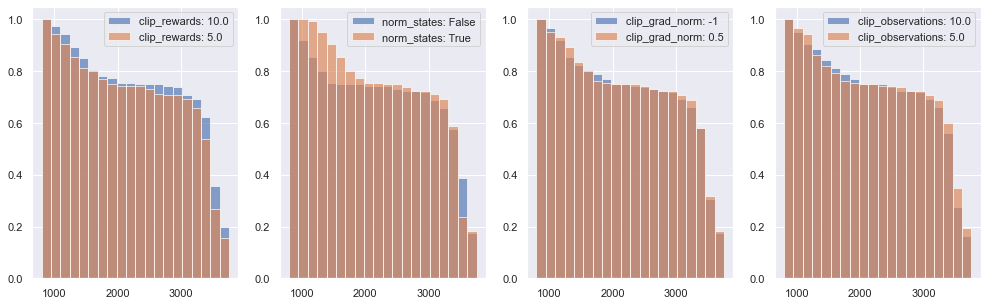

In [13]:
max_rewards = opt.groupby('exp_id').max()

# Histogram setup
_, bin_edges = np.histogram(max_rewards['mean_reward'].tolist(), NUM_BINS)
bin_locs = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_ws = (bin_edges[1] - bin_edges[0])

# Plot setup
kwargs = {'width': bin_ws, 'alpha': 0.65}
fig, ax = plt.subplots(1, 4, figsize=(17,5))

for i, cl_opt in enumerate(code_level_opts):
    for b in reversed(code_level_opts[cl_opt]):
        exp_ids = set(metadata[metadata[cl_opt] == b]['exp_id'].tolist())
        filt = max_rewards[max_rewards.index.isin(exp_ids)]
        hist, _ = np.histogram(filt['mean_reward'].tolist(), bin_edges)
        hist = np.flip(np.cumsum(np.flip(hist))) / np.sum(hist)
        ax[i].bar(bin_locs, hist, label=f"{cl_opt}: {b}", **kwargs)
    ax[i].legend()
plt.show()

# Aggregate performance (max over learning rates, avg over trials)

In [23]:
max_rewards

,mean_reward,final_value_loss,mean_std
exp_id,,,
009a64da-2417-4d47-9d9a-3505c22fff96,3381.459019,1.569458,0.987658
022f63ee-e566-4838-830d-1ea6c4a1a672,3589.625418,0.745677,0.997000
029ce075-5f54-4863-9275-328feb507264,3494.404748,1.520695,0.993276
0365f0a1-588a-4b34-8f7f-6b518ece8b17,3486.706100,0.803341,0.995774
03f1112f-876f-45ba-8d85-efed9240f28c,2979.482895,1.103597,0.996481
...,...,...,...
fe8cb4a8-8fb5-4bff-a13e-d3a8d6e23cf0,3354.375914,1.708616,0.997676
fe9e7a64-0a6e-4efb-be88-88d321b33611,1212.869895,1.119438,1.000216
ff0a27a4-c6cb-44f0-bf87-2f8dc091cc5a,3699.410483,0.563548,0.987247


In [21]:
ks = list(code_level_opts.keys())
grouped_1 = max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index().set_index('mean_reward')
grouped_1.groupby(ks).mean()

ppo_lr_adam  \
clip_rewards norm_states clip_grad_norm clip_observations                
5.0          False       -1.0           5.0                   0.000115   
                                        10.0                  0.000115   
                          0.5           5.0                   0.000115   
                                        10.0                  0.000115   
             True        -1.0           5.0                   0.000115   
                                        10.0                  0.000115   
                          0.5           5.0                   0.000115   
                                        10.0                  0.000115   
10.0         False       -1.0           5.0                   0.000115   
                                        10.0                  0.000115   
                          0.5           5.0                   0.000115   
                                        10.0                  0.000115   
             True        -1.0           5.0                   0.000115   
                                        10.0                  0.000115   
                          0.5           5.0                   0.000115   
                                        10.0                  0.000115   

                                                           final_value_loss  \
clip_rewards norm_states clip_grad_norm clip_observations                     
5.0          False       -1.0           5.0                        1.085559   
                                        10.0                       1.321260   
                          0.5           5.0                        1.072477   
                                        10.0                       1.171264   
             True        -1.0           5.0                        1.215700   
                                        10.0                       1.227086   
                          0.5           5.0                        1.113324   
                                        10.0                       1.135379   
10.0         False       -1.0           5.0                        1.007419   
                                        10.0                       1.331549   
                          0.5           5.0                        1.093380   
                                        10.0                       1.238897   
             True        -1.0           5.0                        1.169070   
                                        10.0                       1.208519   
                          0.5           5.0                        1.122135   
                                        10.0                       1.114488   

                                                           mean_std  \
clip_rewards norm_states clip_grad_norm clip_observations             
5.0          False       -1.0           5.0                0.996588   
                                        10.0               0.997333   
                          0.5           5.0                0.995444   
                                        10.0               0.996371   
             True        -1.0           5.0                0.996887   
                                        10.0               0.996098   
                          0.5           5.0                0.996114   
                                        10.0               0.997078   
10.0         False       -1.0           5.0                0.996765   
                                        10.0               0.996841   
                          0.5           5.0                0.995812   
                                        10.0               0.996535   
             True        -1.0           5.0                0.997373   
                                        10.0               0.996938   
                          0.5           5.0                0.997669   
                                        10.0               0.995851   

                        

In [22]:
ks = list(code_level_opts.keys())
grouped_1 = max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index().set_index('mean_reward')
grouped_1.groupby(ks).max()

ppo_lr_adam  \
clip_rewards norm_states clip_grad_norm clip_observations                
5.0          False       -1.0           5.0                    0.00022   
                                        10.0                   0.00022   
                          0.5           5.0                    0.00022   
                                        10.0                   0.00022   
             True        -1.0           5.0                    0.00022   
                                        10.0                   0.00022   
                          0.5           5.0                    0.00022   
                                        10.0                   0.00022   
10.0         False       -1.0           5.0                    0.00022   
                                        10.0                   0.00022   
                          0.5           5.0                    0.00022   
                                        10.0                   0.00022   
             True        -1.0           5.0                    0.00022   
                                        10.0                   0.00022   
                          0.5           5.0                    0.00022   
                                        10.0                   0.00022   

                                                           final_value_loss  \
clip_rewards norm_states clip_grad_norm clip_observations                     
5.0          False       -1.0           5.0                        1.356890   
                                        10.0                       1.494098   
                          0.5           5.0                        1.161390   
                                        10.0                       1.237648   
             True        -1.0           5.0                        1.402122   
                                        10.0                       1.477192   
                          0.5           5.0                        1.161401   
                                        10.0                       1.558423   
10.0         False       -1.0           5.0                        1.166301   
                                        10.0                       1.742487   
                          0.5           5.0                        1.292387   
                                        10.0                       1.493171   
             True        -1.0           5.0                        1.418348   
                                        10.0                       1.520679   
                          0.5           5.0                        1.252637   
                                        10.0                       1.294055   

                                                           mean_std  \
clip_rewards norm_states clip_grad_norm clip_observations             
5.0          False       -1.0           5.0                0.999790   
                                        10.0               0.999767   
                          0.5           5.0                0.999982   
                                        10.0               0.999876   
             True        -1.0           5.0                1.000085   
                                        10.0               0.999962   
                          0.5           5.0                0.999889   
                                        10.0               0.999710   
10.0         False       -1.0           5.0                0.999986   
                                        10.0               0.999896   
                          0.5           5.0                0.999847   
                                        10.0               0.999989   
             True        -1.0           5.0                1.000155   
                                        10.0               0.999716   
                          0.5           5.0                0.999965   
                                        10.0               0.999916   

                        